In [2]:
using Convex
using SCS # I think I fixed it
using ECOS
using Plots
using LinearAlgebra

In [3]:
include("plotregion.jl")

Main.PlotRegion

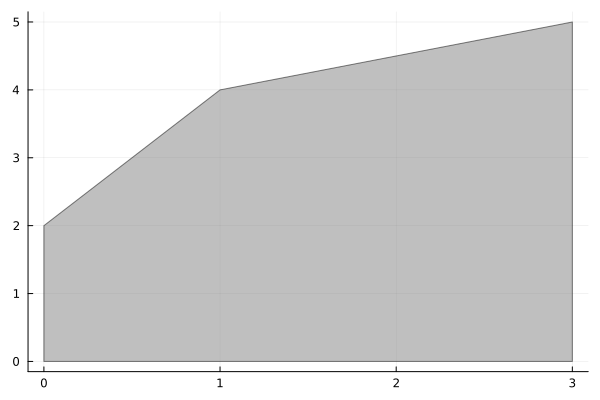

In [4]:
A1 = [-2.0 1; 
      -1 2; 
       1 0]
b = [2.0; 7; 3]

A = [A1 Matrix{Float64}(I,3,3)] # form the problem with slacks.

PlotRegion.plotregion(A,b)

In [5]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

3×5 Matrix{Float64}:
 -2.0  1.0  1.0  0.0  0.0
 -1.0  2.0  0.0  1.0  0.0
  1.0  0.0  0.0  0.0  1.0

In [6]:
""" Solve the central-path problem for interior point methods. """
function ip_central(c,A,b,tau)
    x = Variable(length(c))
    p = minimize(c'*x - tau*sum(log(x)))
    p.constraints += A*x == b
    #p.constraints += x .>= 0
    #solve!(p, SCSSolver(verbose=false, eps=1e-6, rho_x=1e-5))
    solve!(p, ECOS.Optimizer; silent_solver = true)
    return x.value, p
end
ip_central(cs,AS,b,10.0)[1]

5×1 Matrix{Float64}:
 2.194306745844007
 2.19689605264216
 4.191717426412428
 4.8005145961358595
 0.8056932352928711

In [9]:
ip_central(cs,AS,b,1e-7)[1]

5×1 Matrix{Float64}:
 2.9999999527872614
 4.999999927790513
 2.9999999774138804
 9.632385127797924e-8
 4.70706169504064e-8

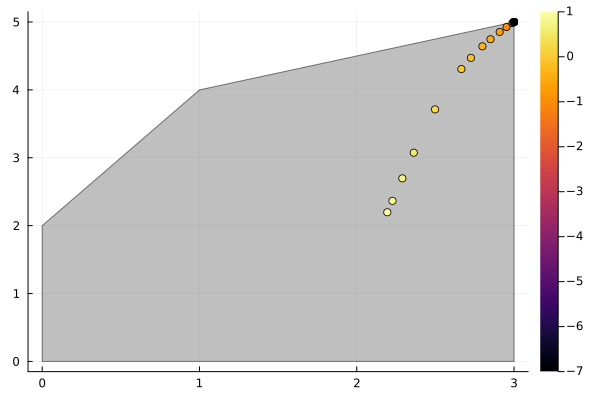

In [8]:
taus = vec([10 7.5 5 3.5 2 1 0.75 0.5 0.35 0.20 10.0.^(range(-1,stop=-7,length=10))'])

p = PlotRegion.plotregion(AS,b)
for tau in taus
    x = ip_central(cs, AS, b, tau)[1]
    scatter!([x[1]],[x[2]],label="", marker_z=log10(tau))
end
p

In [ ]:
taus = vec([10 7.5 5 3.5 2 1 0.75 0.5 0.35 0.20 10.0.^(range(-1,stop=-7,length=10))'])

p = PlotRegion.plotregion(AS,b)
for tau in taus
    x = ip_central([-1 0 0 0 0.0]', AS, b, tau)[1]
    scatter!([x[1]],[x[2]],label="", marker_z=log10(tau))
end
p

In [ ]:
x = ip_central([-1,-2.0,0,0,0], AS, b, 0.0002)
@show x[1]

In [ ]:
A1 = [-2.0 1; 
      -1 2; 
       1 0]
b = [2.0; 7; 3]

AS = [A1 Matrix{Float64}(I,3,3)] # form the problem with slacks.
cs = [1 0 0 0 0]'
#cs = [-1 -2 0 0 0]'

taus = vec([10 7.5 5 3.5 2 1 0.75 0.5 0.35 0.20 10.0.^(range(-1,stop=-7,length=10))'])

p = PlotRegion.plotregion(AS,b)
for tau in taus
    x = ip_central(cs, AS, b, tau)[1]
    scatter!([x[1]],[x[2]],label="", color="red")
end
p


## Show a centered vs. uncentered step


In [ ]:
# Convert the problem into standard form.
cs = [-1 -2 0 0 0]'
AS = A

tau = 1.0
x0,prob = ip_central(cs,AS,b,tau)
x = copy(x0)
x[1] += 0.5
x[2] += 0.5

lam = vec(prob.constraints[1].dual)
@show lam

# show the region and the starting point
plt = PlotRegion.plotregion(AS,b)
scatter!([x[1]],[x[2]],label="", color="red")

# compute the steps 
n = length(cs)
m = size(AS,1)

s = tau./x
J = [zeros(n,n) AS'         Matrix{Float64}(I,n,n); 
     AS        zeros(m,m)   zeros(m,n);
    Diagonal(vec(s))  zeros(n,m) Diagonal(vec(x))]

mu = dot(x,s)/n
sigma = 0.5

F = [s + AS'*lam - cs; AS*x - b; x.*s]

Fc = [s + AS'*lam .- cs; AS*x .- b; x.*s .- sigma*mu ]

p = J\-F
pc = J\-Fc

plot!([x[1];x[1] + p[1]], [x[2];x[2] + p[2]], label="Affine")
plot!([x[1];x[1] + pc[1]], [x[2];x[2] + pc[2]], label = "Centered")

plt

In [ ]:
xf = [x; lam; s];

[xf+p xf+pc]

In [ ]:
taus = vec([10 7.5 5 3.5 2 1 0.75 0.5 0.35 0.20 10.0.^(range(-1,stop=-7,length=10))'])

p = PlotRegion.plotregion(AS,b)
for tau in taus
    x = ip_central(cs, AS, b, tau)[1]
    @show tau
    @show x
    scatter!([x[1]],[x[2]],label="", color="red")
end
p

In [ ]:
x = ip_central([-1,-2.0,0,0,0], AS, b, 0.0002)
@show x[1]